In [1]:
import sys
sys.path.append('/Users/kanishkjain/opt/anaconda3/envs/gym/lib/python3.9/site-packages')

import gym
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
class Agent:
    def __init__(self, environment='CliffWalking-v0', gamma=0.1, theta=1e-8) -> None:
        
        self.env = gym.make(environment)
        self.env.reset()
        
        self.theta = theta
        
        self.A_space = self.env.action_space
        self.S_space = self.env.observation_space
        self.R_range = self.env.reward_range

        self.Num_A = self.A_space.n
        self.Num_S = self.S_space.n
        
        if environment == 'CliffWalking-v0':
            for s in range(self.Num_S):
                for a in range(self.Num_A):
                    P, S_, R_, T = self.env.P[s][a][0]
                    if T:
                        self.env.P[s][a] = [(P, S_, 0, T)]
                
    
    def random_policy(self, gamma=0.1):
        
        V = np.random.rand(self.Num_S)
        Pi = np.random.randint(0, self.Num_A, (self.Num_S, ))
        
        returns = []
        for s in range(self.Num_S):
            Pi[s] = self.env.action_space.sample()
        returns.append(self.calculate_reward(Pi, gamma))
        
        return V, Pi, returns
    
    def calculate_reward(self, Pi, gamma):
        MAX_STEPS = 50
        
        S = self.env.reset()
        
        terminal = False
        step = 0
        G = 0
        while not terminal and step<MAX_STEPS:
            A = Pi[S]
            S, R, done, _ = self.env.step(A)
            G += R
            step += 1
            terminal = done
        return G
            
    
    def policy_evaluation(self, V, Pi, gamma):
        while True:
            delta = 0
            
            for s in range(self.Num_S):
                v = V[s]
                a = Pi[s]
                V[s] = sum([P*(R_ + gamma*V[S_]) for P, S_, R_, _ in self.env.P[s][a]])
                delta = max(delta, abs(v - V[s]))
            if delta < self.theta: 
                break
        return V

    def policy_improvement(self, V, Pi, gamma):
        policy_stable = True
        for s in range(self.Num_S):
            a = Pi[s]
            Pi[s] = np.argmax([sum([P*(R_ + gamma*V[S_]) for P, S_, R_, _ in self.env.P[s][a_]]) for a_ in range(self.Num_A)])
            if a!=Pi[s]:
                policy_stable = False
        return Pi, policy_stable
    
    def policy_iteration(self, gamma=0.9):
        
        S_start = self.env.reset()
        
        V = np.random.rand(self.Num_S)
        Pi = np.random.randint(0, self.Num_A, (self.Num_S, ))
        
        count = 0
        returns = []
        
        while True:
            V = self.policy_evaluation(V, Pi, gamma)
            Pi, policy_stable = self.policy_improvement(V, Pi, gamma)
            count += 1
            returns.append(self.calculate_reward(Pi, gamma))
            if policy_stable:
                break
                
        return V, Pi, returns
    
    def value_iteration(self, gamma=0.9):
        
        S_start = self.env.reset()
        
        V = np.random.rand(self.Num_S)
        Pi = np.random.randint(0, self.Num_A, (self.Num_S, ))
        
        count = 0
        returns = []
        
        while True:
            delta = 0
            for s in range(self.Num_S):
                v = V[s]
                V[s] = max([sum([P*(R_ + gamma*V[S_]) for P, S_, R_, _ in self.env.P[s][a_]]) for a_ in range(self.Num_A)])
                delta = max(delta, abs(v - V[s]))
            count += 1
            for s in range(self.Num_S):
                Pi[s] = np.argmax([sum([P*(R_ + gamma*V[S_]) for P, S_, R_, _ in self.env.P[s][a_]]) for a_ in range(self.Num_A)])
            returns.append(self.calculate_reward(Pi, gamma))
            if delta < self.theta: 
                break
        
        return V, Pi, returns
    
    def show_policy(self, Pi):
        
        MAX_STEPS = 100
        
        S = self.env.reset()
        
        T = False
        step = 0
        while not T and step<MAX_STEPS:
            A = Pi[S]
            S, R_, done, _ = self.env.step(A)
            self.env.render()
            step += 1
            T = done
        # self.env.render()
        print("Finished", done)

In [3]:
N = 100

In [4]:
## Policy Iteration
policy_agent = Agent(environment='CliffWalking-v0')

policy_returns_over_N = []
for _ in range(N):
    V, Pi, returns = policy_agent.policy_iteration()
    policy_returns_over_N.append(returns)
policy_agent.show_policy(Pi)

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  x  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  x  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  x  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o

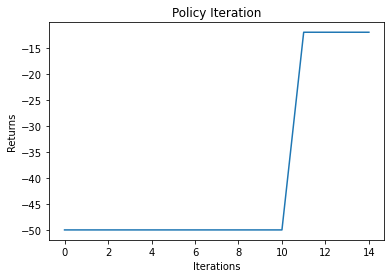

In [5]:
policy_returns = returns
plt.plot(policy_returns)

plt.xlabel("Iterations")
plt.ylabel("Returns")
plt.title("Policy Iteration")

plt.show()

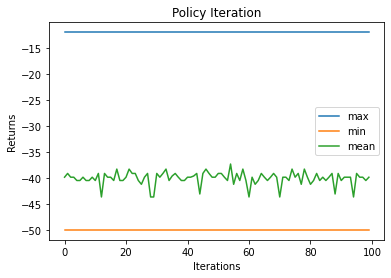

In [6]:
policy_max_return = []
policy_min_return = []
policy_mean_return = []

for return_ in policy_returns_over_N:
    policy_max_return.append(max(return_))
    policy_min_return.append(min(return_))
    policy_mean_return.append(sum(return_)/len(return_))

plt.plot(policy_max_return, label='max')
plt.plot(policy_min_return, label='min')
plt.plot(policy_mean_return, label='mean')
# plt.ylim(-60, -5)
# plt.xlim(0, len(policy_returns_over_N))

plt.xlabel("Iterations")
plt.ylabel("Returns")
plt.title("Policy Iteration")

plt.legend()
plt.show()

In [7]:
print("Final State Values: ", V)
print("Final Policy: ", Pi)

Final State Values:  [-7.45813418e+00 -7.17570464e+00 -6.86189404e+00 -6.51321560e+00
 -6.12579512e+00 -5.69532791e+00 -5.21703101e+00 -4.68559001e+00
 -4.09510001e+00 -3.43900001e+00 -2.71000001e+00 -1.90000001e+00
 -7.17570464e+00 -6.86189404e+00 -6.51321560e+00 -6.12579512e+00
 -5.69532791e+00 -5.21703101e+00 -4.68559001e+00 -4.09510001e+00
 -3.43900001e+00 -2.71000001e+00 -1.90000001e+00 -1.00000001e+00
 -6.86189404e+00 -6.51321560e+00 -6.12579512e+00 -5.69532791e+00
 -5.21703101e+00 -4.68559001e+00 -4.09510001e+00 -3.43900001e+00
 -2.71000001e+00 -1.90000001e+00 -1.00000001e+00 -5.71461408e-09
 -7.17570464e+00 -6.86189404e+00 -6.51321560e+00 -6.12579512e+00
 -5.69532791e+00 -5.21703101e+00 -4.68559001e+00 -4.09510001e+00
 -3.43900001e+00 -2.71000001e+00 -5.71461408e-09 -5.71461408e-09]
Final Policy:  [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 0
 0 0 0 0 0 0 0 0 0 1 1]


In [8]:
## Value Iteration
value_agent = Agent(environment='CliffWalking-v0')

value_returns_over_N = []
for _ in range(N):
    V, Pi, returns = value_agent.value_iteration()
    value_returns_over_N.append(returns)

value_agent.show_policy(Pi)

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  x  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  x  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  x  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o

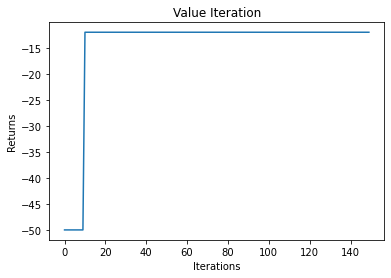

In [9]:
value_returns = returns
plt.plot(value_returns)

plt.xlabel("Iterations")
plt.ylabel("Returns")
plt.title("Value Iteration")

plt.show()

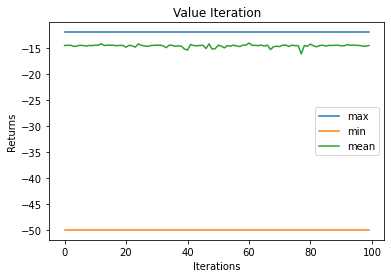

In [10]:
value_max_return = []
value_min_return = []
value_mean_return = []

for return_ in value_returns_over_N:
    value_max_return.append(max(return_))
    value_min_return.append(min(return_))
    value_mean_return.append(sum(return_)/len(return_))

plt.plot(value_max_return, label='max')
plt.plot(value_min_return, label='min')
plt.plot(value_mean_return, label='mean')
# plt.ylim(-60, -10)
# plt.xlim(0, len(value_returns_over_N))

plt.xlabel("Iterations")
plt.ylabel("Returns")
plt.title("Value Iteration")

plt.legend()
plt.show()

In [11]:
print("Final State Values: ", V)
print("Final Policy: ", Pi)

Final State Values:  [-7.45813409e+00 -7.17570455e+00 -6.86189395e+00 -6.51321551e+00
 -6.12579503e+00 -5.69532782e+00 -5.21703092e+00 -4.68558992e+00
 -4.09509992e+00 -3.43899992e+00 -2.70999992e+00 -1.89999992e+00
 -7.17570455e+00 -6.86189395e+00 -6.51321551e+00 -6.12579503e+00
 -5.69532782e+00 -5.21703092e+00 -4.68558992e+00 -4.09509992e+00
 -3.43899992e+00 -2.70999992e+00 -1.89999992e+00 -9.99999915e-01
 -6.86189395e+00 -6.51321551e+00 -6.12579503e+00 -5.69532782e+00
 -5.21703092e+00 -4.68558992e+00 -4.09509992e+00 -3.43899992e+00
 -2.70999992e+00 -1.89999992e+00 -9.99999915e-01  8.49111628e-08
 -7.17570456e+00 -6.86189396e+00 -6.51321552e+00 -6.12579503e+00
 -5.69532782e+00 -5.21703092e+00 -4.68558992e+00 -4.09509992e+00
 -3.43899992e+00 -2.70999992e+00  8.49111628e-08  8.49111628e-08]
Final Policy:  [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 0
 0 0 0 0 0 0 0 0 0 1 1]


In [12]:
## Confused Iteration
confused_agent = Agent(environment='CliffWalking-v0')

confused_returns_over_N = []
for _ in range(N):
    V, Pi, returns = confused_agent.random_policy()
    confused_returns_over_N.append(returns)
    
# value_agent.show_policy()

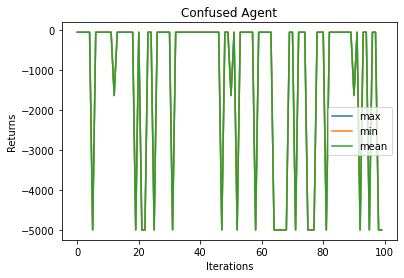

In [13]:
confused_max_return = []
confused_min_return = []
confused_mean_return = []

for return_ in confused_returns_over_N:
    confused_max_return.append(max(return_))
    confused_min_return.append(min(return_))
    confused_mean_return.append(sum(return_)/len(return_))

plt.plot(confused_max_return, label='max')
plt.plot(confused_min_return, label='min')
plt.plot(confused_mean_return, label='mean')
# plt.ylim(-60, -30)
# plt.xlim(0, len(confused_returns_over_N))

plt.xlabel("Iterations")
plt.ylabel("Returns")
plt.title("Confused Agent")

plt.legend()
plt.show()

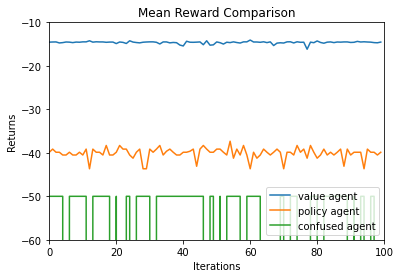

In [20]:
plt.plot(value_mean_return, label='value agent')
plt.plot(policy_mean_return, label='policy agent')
plt.plot(confused_mean_return, label='confused agent')
plt.ylim(-60, -10)
plt.xlim(0, N)

plt.xlabel("Iterations")
plt.ylabel("Returns")
plt.title("Mean Reward Comparison")

plt.legend()
plt.show()

In [26]:
method_info = {}

for gamma in [0, 0.1, 0.5, 0.75,0.9999]:
    method_info[gamma] = {}
    print("==============================================================================")
    # policy_agent.gamma = gamma
    V, Pi, returns = policy_agent.policy_iteration(gamma)
    # policy_agent.show_policy(Pi)
    method_info[gamma]["PolicyIterations"] = len(returns)
    print(f'Policy Iterations: {len(returns)}, Gamma: {gamma}')
    print(f'Pi: {Pi}')
    print("------------------------------------------------------------------------------")
    # value_agent.gamma = gamma
    V, Pi, returns = value_agent.value_iteration(gamma)
    # value_agent.show_policy(Pi)
    method_info[gamma]["ValueIterations"] = len(returns)
    print(f'Value Iterations: {len(returns)}, Gamma: {gamma}')
    print(f'Pi: {Pi}')
    print("==============================================================================")

Policy Iterations: 2, Gamma: 0
Pi: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 1 1]
------------------------------------------------------------------------------
Value Iterations: 2, Gamma: 0
Pi: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 1 1]
Policy Iterations: 16, Gamma: 0.1
Pi: [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 0
 0 0 0 0 0 0 0 0 0 1 1]
------------------------------------------------------------------------------
Value Iterations: 10, Gamma: 0.1
Pi: [0 0 0 1 1 1 1 1 1 1 1 2 0 0 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 2 0
 0 0 0 0 0 0 0 0 0 1 1]
Policy Iterations: 15, Gamma: 0.5
Pi: [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 0
 0 0 0 0 0 0 0 0 0 1 1]
------------------------------------------------------------------------------
Value Iterations: 26, Gamma: 0.5
Pi: [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 

In [27]:
df = pd.DataFrame.from_dict(method_info, orient='index')
df.index.name = 'gamma'
print(df)

        PolicyIterations  ValueIterations
gamma                                    
0.0000                 2                2
0.1000                16               10
0.5000                15               26
0.7500                16               60
0.9999                14            78290


For zero gamma values, both policy iteration and value iteration fail to learn a optimal policy to complete the task as the agent only focuses on immediate rewards. As the value of gamma increases, the number of iterations required to learn the optimal policy and state value function increases. For policy iteration, the number of steps in policy evaluation increases.